**HEART DISEASE UCI-DIAGNOSIS PREDICTION**

**Dataset Column Description**
- age: The person’s age in years
- sex: The person’s sex (1 = male, 0 = female)
- cp: chest pain type
  - Value 0: asymptomatic
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: typical angina
- trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
- chol    : The person’s cholesterol measurement in mg/dl
- fbs     : The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg  : resting electrocardiographic results
  - Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria 
  - Value 1: normal
  - Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

thalach: The person’s maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment — 0: downsloping;  
- 1: flat 
- 2: upsloping
- 0: downsloping 
- 1: flat
- 2: upsloping

ca : The number of major vessels (0–3)
- thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
- Value 1: fixed defect (no blood flow in some part of the heart)
- Value 2: normal blood flow
- Value 3: reversible defect (a blood flow is observed but it is not normal)
- target: Heart disease (1 = no, 0= yes) 

**Context**

- This is multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has a heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

- *This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.*

  **Table of Content**

1. **Imports and Reading Dataset**
2. **Data Description**
  - Describe
  - Null
3. **Data Analysis**

  1) Univariate Selection

  2) Feature Selection

  3) Correlation Matrix with Heatmap

4. **Data Visualization**

  1) Countplot

  2) Distplot

  3) Jointplot

  4) Boxplot/violinplot

  5) Cluster map

  6) Pairplot

  7) Classification Tree

5. **Data Pre-processing**

   1) Pre-processing

   2) One Hot Encoding

6. **Logistic Regression**

  1) Gather columns

  2) Splitting Data

  3) Normalization

  4) Fitting into the model

  5) Prediction

  6) Model Evaluation

7. **Conclusion**

  1) Coefficients

  2) Analysis

  3) Conclusion

**1. Imports and Reading Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

*File import from local drive to colab*

In [2]:
df=pd.read_csv(r"/content/heart.csv")

df.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

**2. Data Description**

*There has been lot of confusion about the meta data, as there are various different meta data available out there. Over here below I have got the two most used meta data description from kaggle. So we are going to follow the second description(2 — description).*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Null**

*Checking for null values *

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

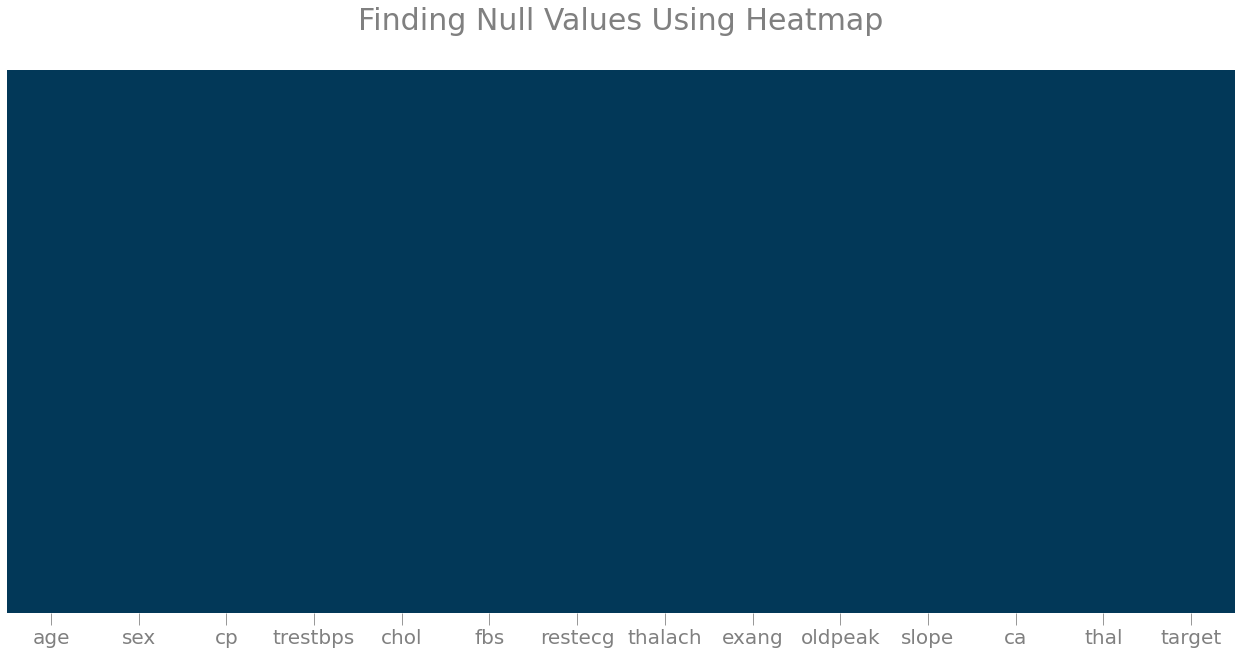

In [5]:
#visualizing Null values if it exists 
plt.figure(figsize=(22,10))
plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')
plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

*Dataset has no null values*

**Pandas-Profiling**

In [6]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     | 38.5MB 603kB/s
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 1.1MB 18.2MB/s 
     |████████████████████████████████| 3.2MB 38.0MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 296kB 47.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=3ad0284e5ad1ebc7dec17584a9ffb34cd421904ccf4d1ed2f24b586b89ec553b
  Stored in directory: /tmp/pip-ephem-wheel-cache-9hnefyv5/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=473cdac227e121d8d5899387dadfcda19a75f8f350fafe599a373cb3bde9204c
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=

In [7]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**3. Data Analysis**

***How to  Feature Selection?***

**Univariate Selection** 

- Statistical tests may be used to pick certain features that have the best relationship to the performance variable.
The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests.
- The following example uses the chi-squared (chi2) statistical test for non-negative features to select 13 of the best features from the Dataset. 

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


**2. Feature Importance**
- You can gain the significance of each feature of your dataset by using the Model Characteristics property.
Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is.
Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top features for the dataset.

[0.0693985  0.0582307  0.12125477 0.06488963 0.05765959 0.01931147
 0.03585708 0.09106052 0.10513868 0.09135235 0.06505193 0.12252018
 0.09827459]


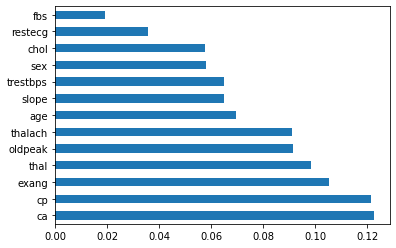

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

3. Correlation Matrix with Heatmap:
- Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable) Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

- Correlation shows whether the characteristics are related to each other or to the target variable. Correlation can be positive (increase in one value, the value of the objective variable increases) or negative (increase in one value, the value of the target variable decreased). From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable. Compared to relation between other two variables we can say that chest pain contributes the most in prediction of presences of a heart disease. Medical emergency is a heart attack. A cardiac occurs usually when blood clot blocks blood flow to the cardiac. Tissue loses oxygen without blood and dies causing chest pain. 

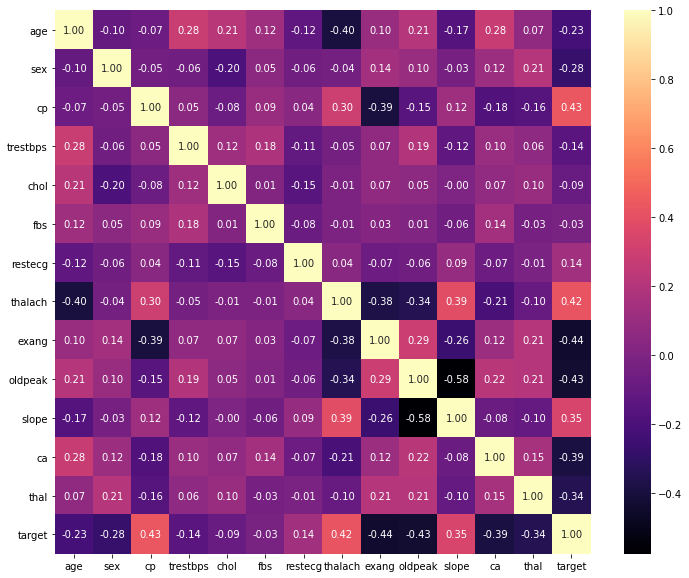

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [11]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


**4. Data Visualization**

**SeaBorn**

In [12]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

**Preparing Data**

In [13]:
df2 = df.copy()

In [14]:
df2 = df.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

**1. Countplot**

Text(0.5, 1.0, 'Gender v/s target\n')

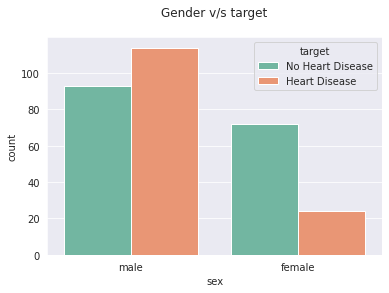

In [15]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

*According to this Cleveland dataset males are more susceptible to get Heart Disease than females. Men experience heart attacks more than women. Sudden Heart Attacks are experienced by men between 70% — 89%. Woman may experience a heart attack with no chest pressure at all, they usually experience nausea or vomiting which are often confused with acid reflux or the flu.*

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

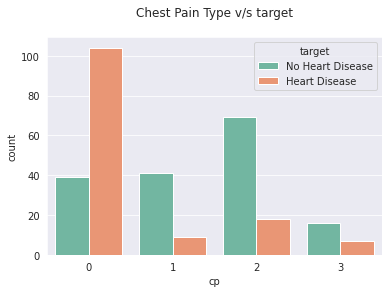

In [16]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

*There are four types of chest pain, asymptomatic, atypical angina, non-anginal pain and typical angina. Most of the Heart Disease patients are found to have asymptomatic chest pain. These group of people might show atypical symptoms like indigestion, flu or a strained chest muscle. A asymptomatic attack, like any heart attack, involves, blockage of blood flow to your heart and possible damage to the heart muscle. The risk factors for asymptomatic heart attacks are same as those with heart symptoms. 

*These factors include:  

- Age
- Diabetes
- Excess weight
- Family History of Heart Disease
- High Blood Pressure
- High cholesterol
- Lack of exercise
- Prior Heart attack
- Tobacco use

Asymptomatic Heart attack puts you at a greater risk of having another heart attack which could be d deadly. Having another heart attack also increases your risk of complications, such as heart failure. There are no test to determine your potential for asymptomatic heart attack. The only way to tell If you had asymptomatic attack is by an electrocardiogram or echocardiogram. These tests can reveal changes that signal a heart attack. 

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


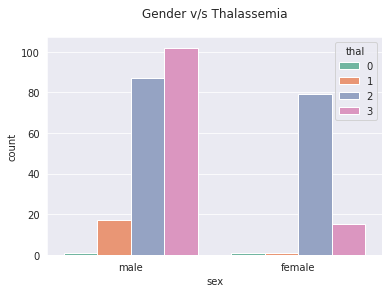

In [17]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

*The Beta thalassemia cardiomyopathy is mainly characterized by two distinct pheno types , dilated type, with left ventricular dilatation and impaired contractility and a restrictive pheno type, with restrictive left ventricular feeling , pulmonary hyper tension and right heart failure. Heart problems, congestive heart failures and abnormal heart rhythms can be associated with severe thalassemia.*

Text(0.5, 1.0, 'Slope v/s Target\n')

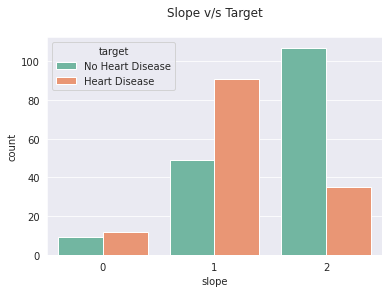

In [18]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

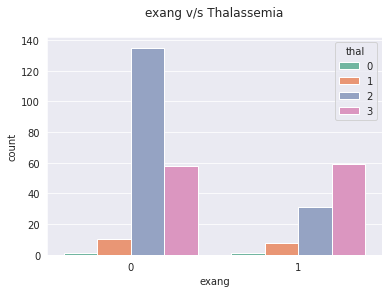

In [19]:
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

**2. Distplot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

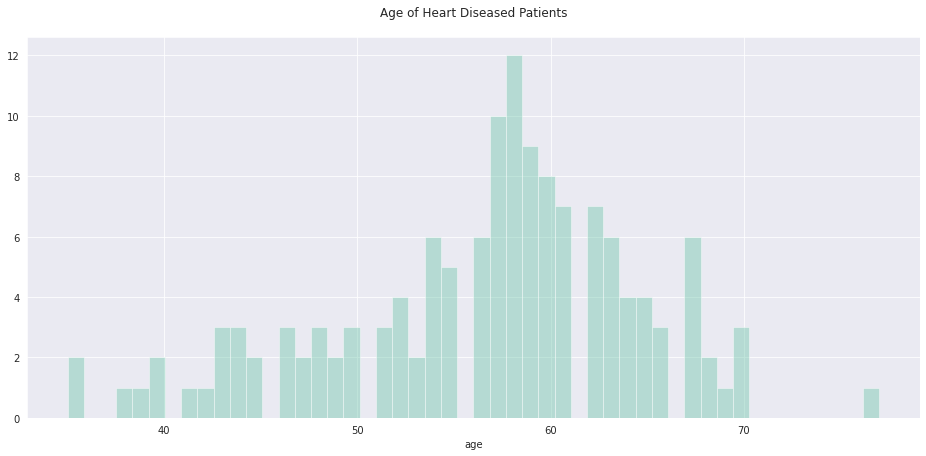

In [20]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

*Heart Disease is very common in the seniors which is composed of age group 60 and above and common among adults which belong to the age group of 41 to 60. But it’s rare among the age group of 19 to 40 and very rare among the age group of 0 to 18.*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

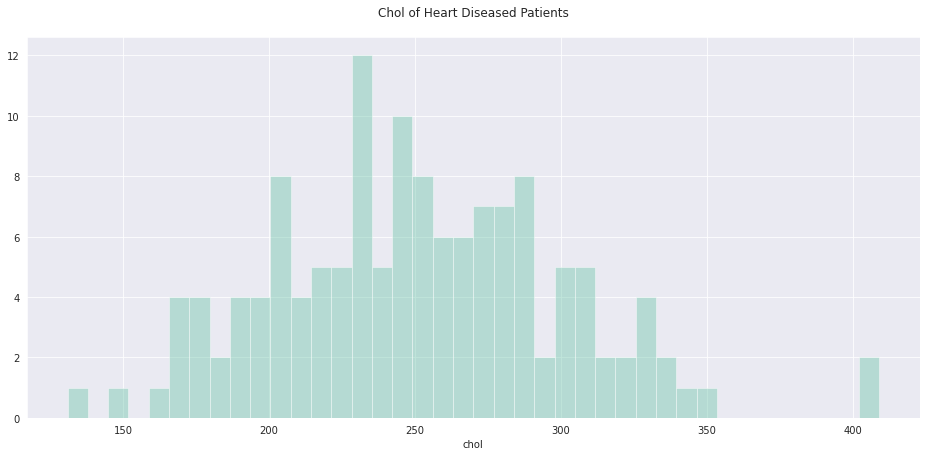

In [21]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

**Total cholesterol**
- LDL : Bad cholesterol
- HDL : Good cholesterol 

- In adults, the total cholesterol levels are considered desirable less than 200 milligram per decilitre ( mg / dL). Borderlines are considered to be high between 200 to 239 mg / dL and 240 mg / dL and above. LDL should contain less than 100 mg / dL of cholesterol. 100 mg / dl rates for individuals without any health issue are appropriate but may be more relevant for those with cardiac problems or risk factors for heart disease. The levels are borderline moderate between 130 and 159 mg / dL and moderate between 160 and 189 mg / dL. The reading is very high at or above 190 mg / dL. Levels of HDL are to be maintained higher. The risk factor for cardiovascular diseases is called a reading less than 40 mg / dL. Borderline low is considered to be between 41 mg / dL and 59 mg / dL. The HDL level can be measured with a maximum of 60 mg / dL.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

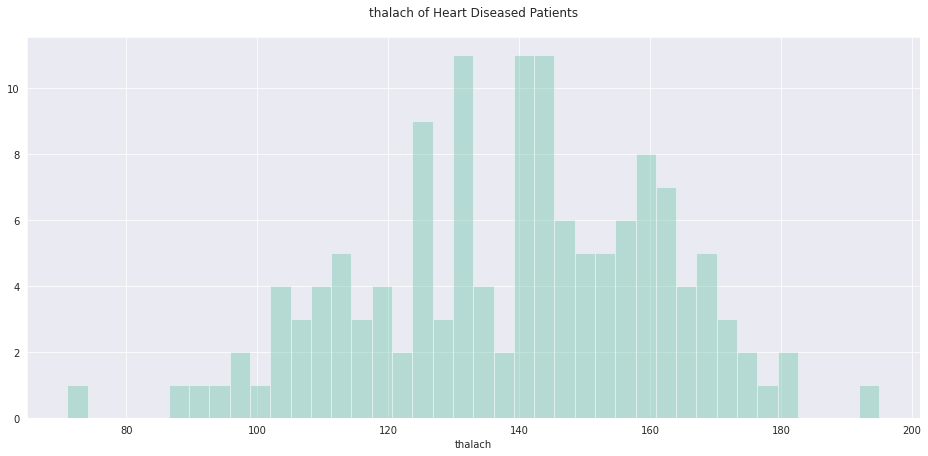

In [22]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

**3. Jointplot**

***Preparing data***

In [23]:
df3 = df[df['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] #target 0 - people with heart disease

Age vs trestbps(Heart Diseased Patinets)


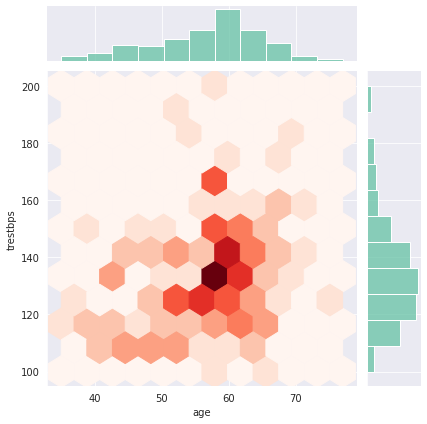

In [24]:
pal = sns.light_palette("blue", as_cmap=True)


print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
x='age',
y='trestbps',
kind='hex',
cmap='Reds'

)

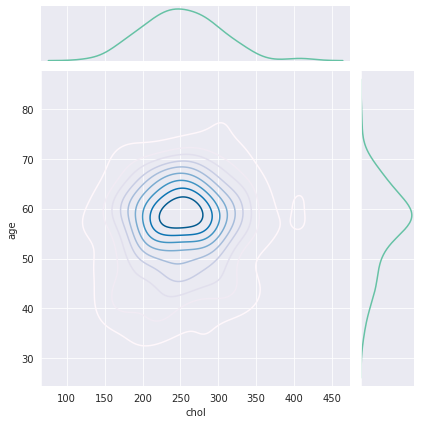

In [25]:
sns.jointplot(data=df3,
x='chol',
y='age',
kind='kde',
cmap='PuBu'
)

*Joint plots in seaborn helps us to understand the trend seen among two features. As observed from the above plot we can see that most of the Heart diseased patients in their age of upper 50s or lower 60s tend to have Cholesterol between 200mg/dl to 300mg/dl.*

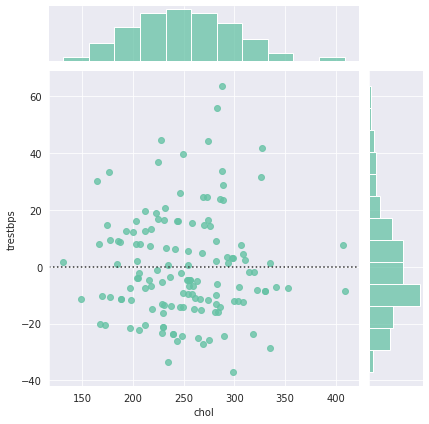

In [26]:
sns.jointplot(data=df3,
x='chol',
y='trestbps',
kind='resid',

)

**4. Boxplot / Biolinplot**

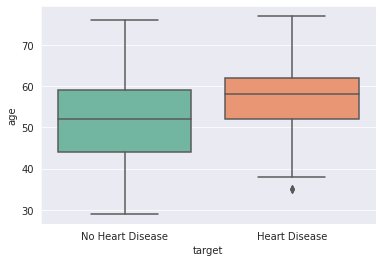

In [27]:
sns.boxplot(data=df2,x='target',y='age')

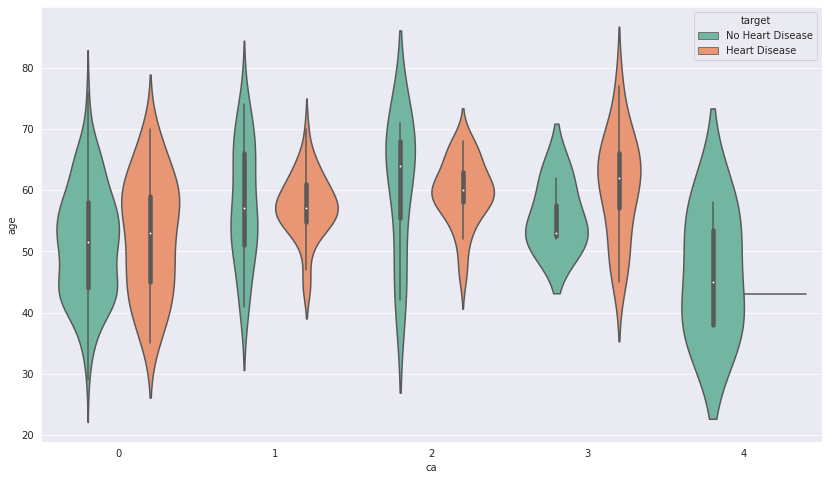

In [28]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df2,x='ca',y='age',hue='target')

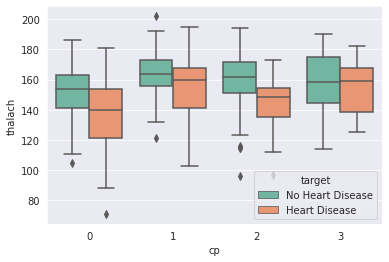

In [29]:
sns.boxplot(data=df2,x='cp',y='thalach',hue='target')

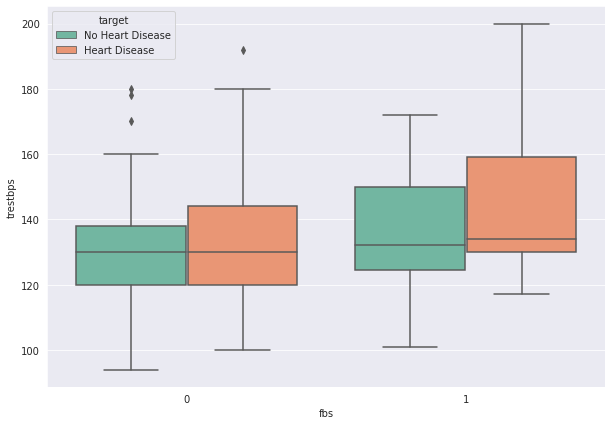

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='fbs',y='trestbps',hue='target')

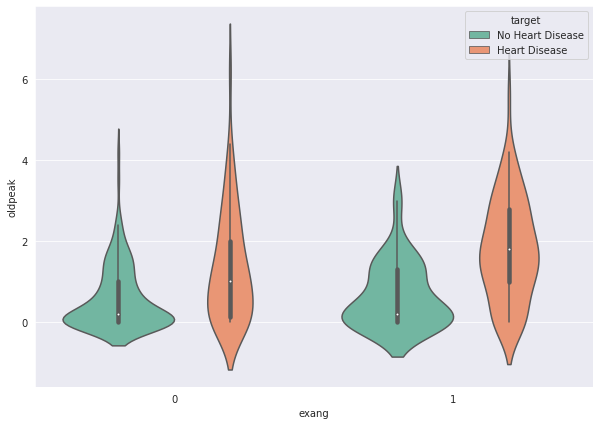

In [31]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df2,x='exang',y='oldpeak',hue='target')

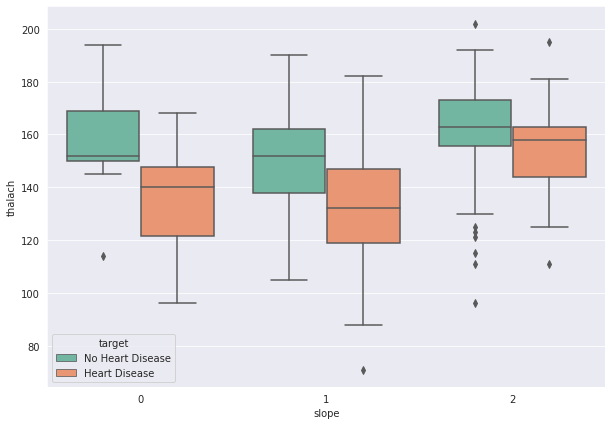

In [32]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='slope',y='thalach',hue='target')

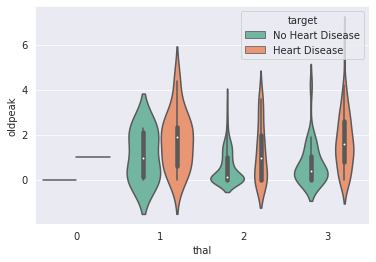

In [33]:
sns.violinplot(data=df2,x='thal',y='oldpeak',hue='target')

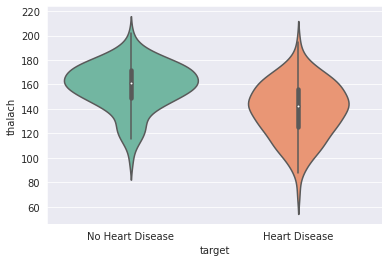

In [34]:
sns.violinplot(data=df2,x='target',y='thalach')

**5. Cluster Plot**

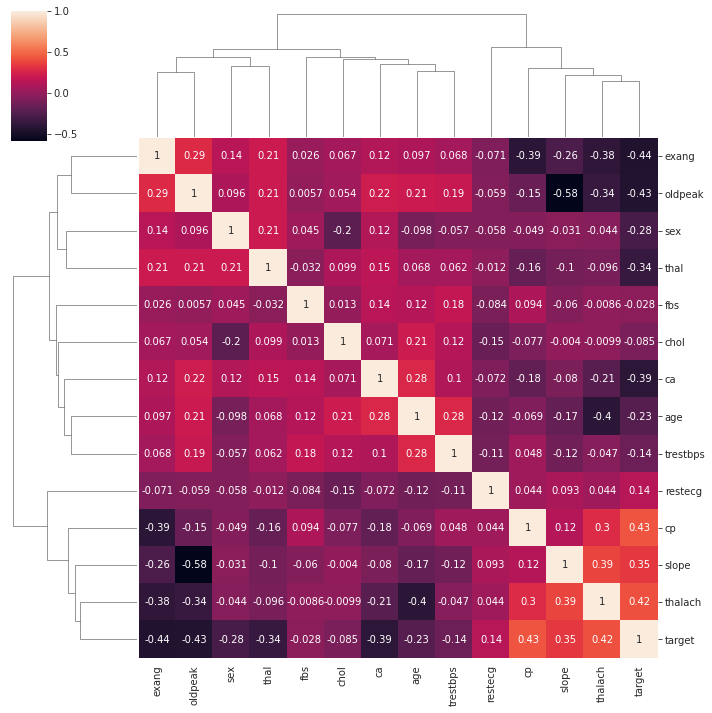

In [35]:
sns.clustermap(df.corr(),annot=True)

**6. Pairplot**

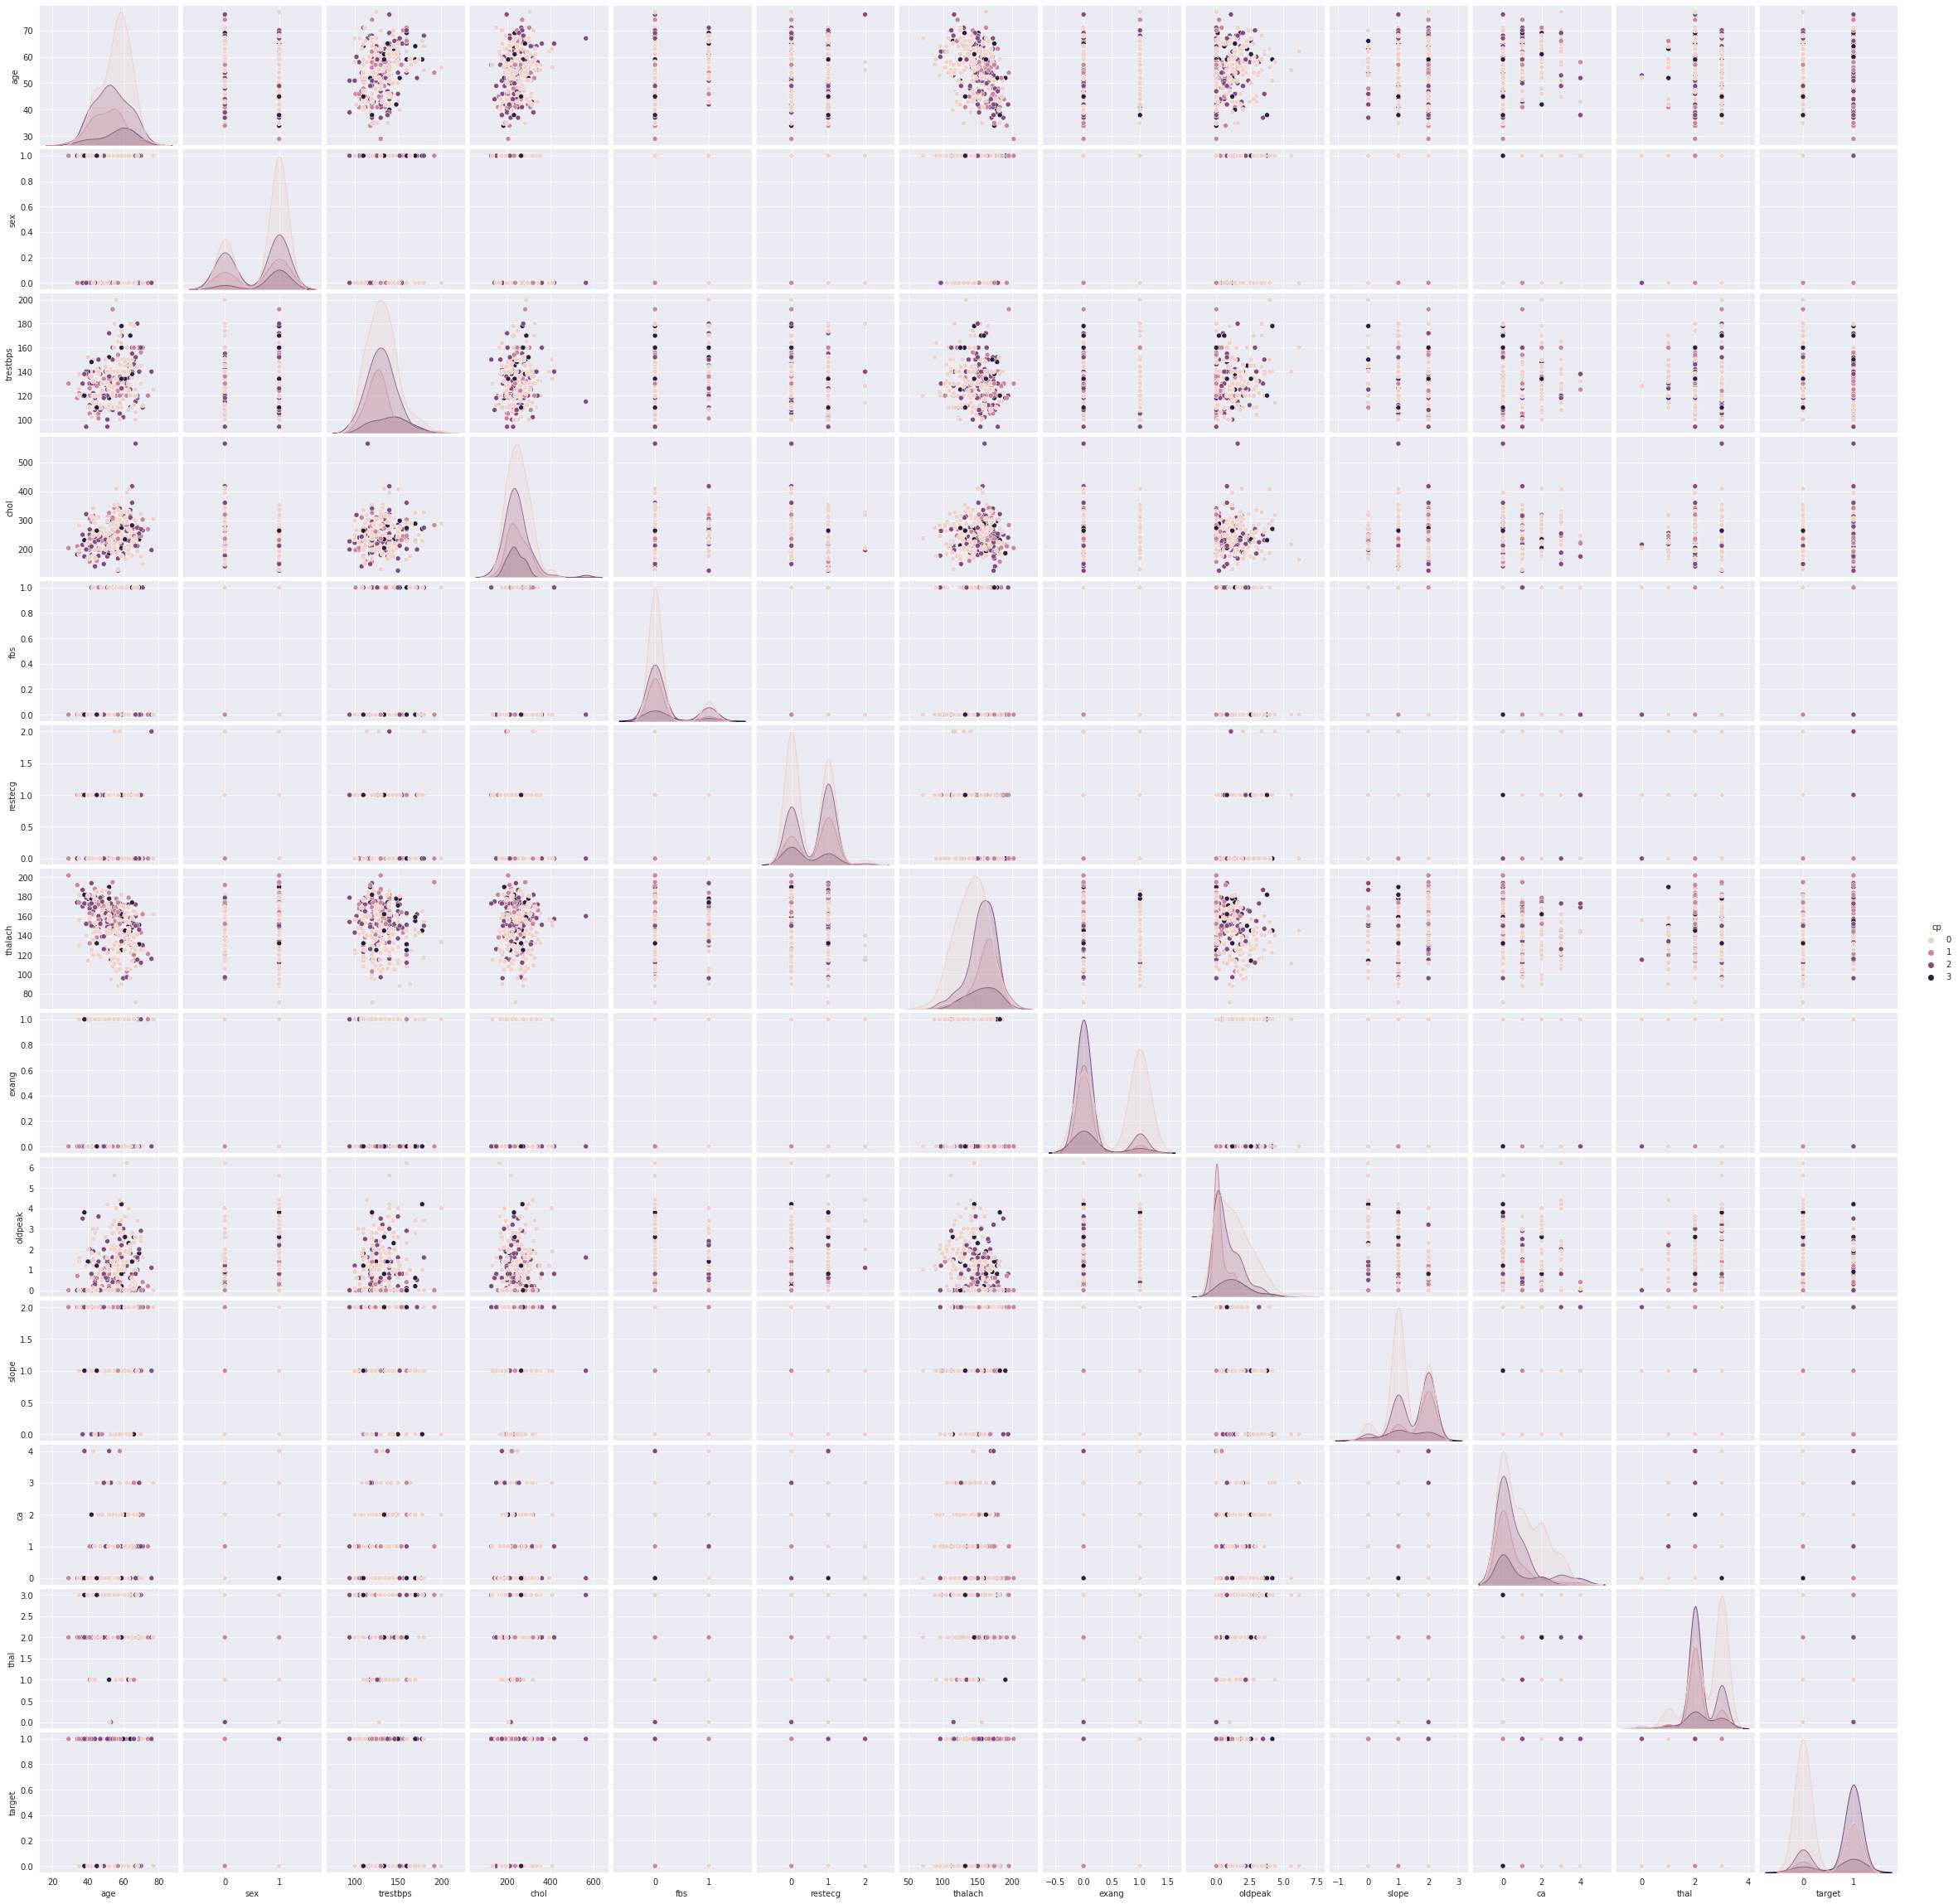

In [36]:
sns.pairplot(df,hue='cp')

**Classification Tree**

In [37]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7252747252747253


In [40]:
feature_cols = ['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


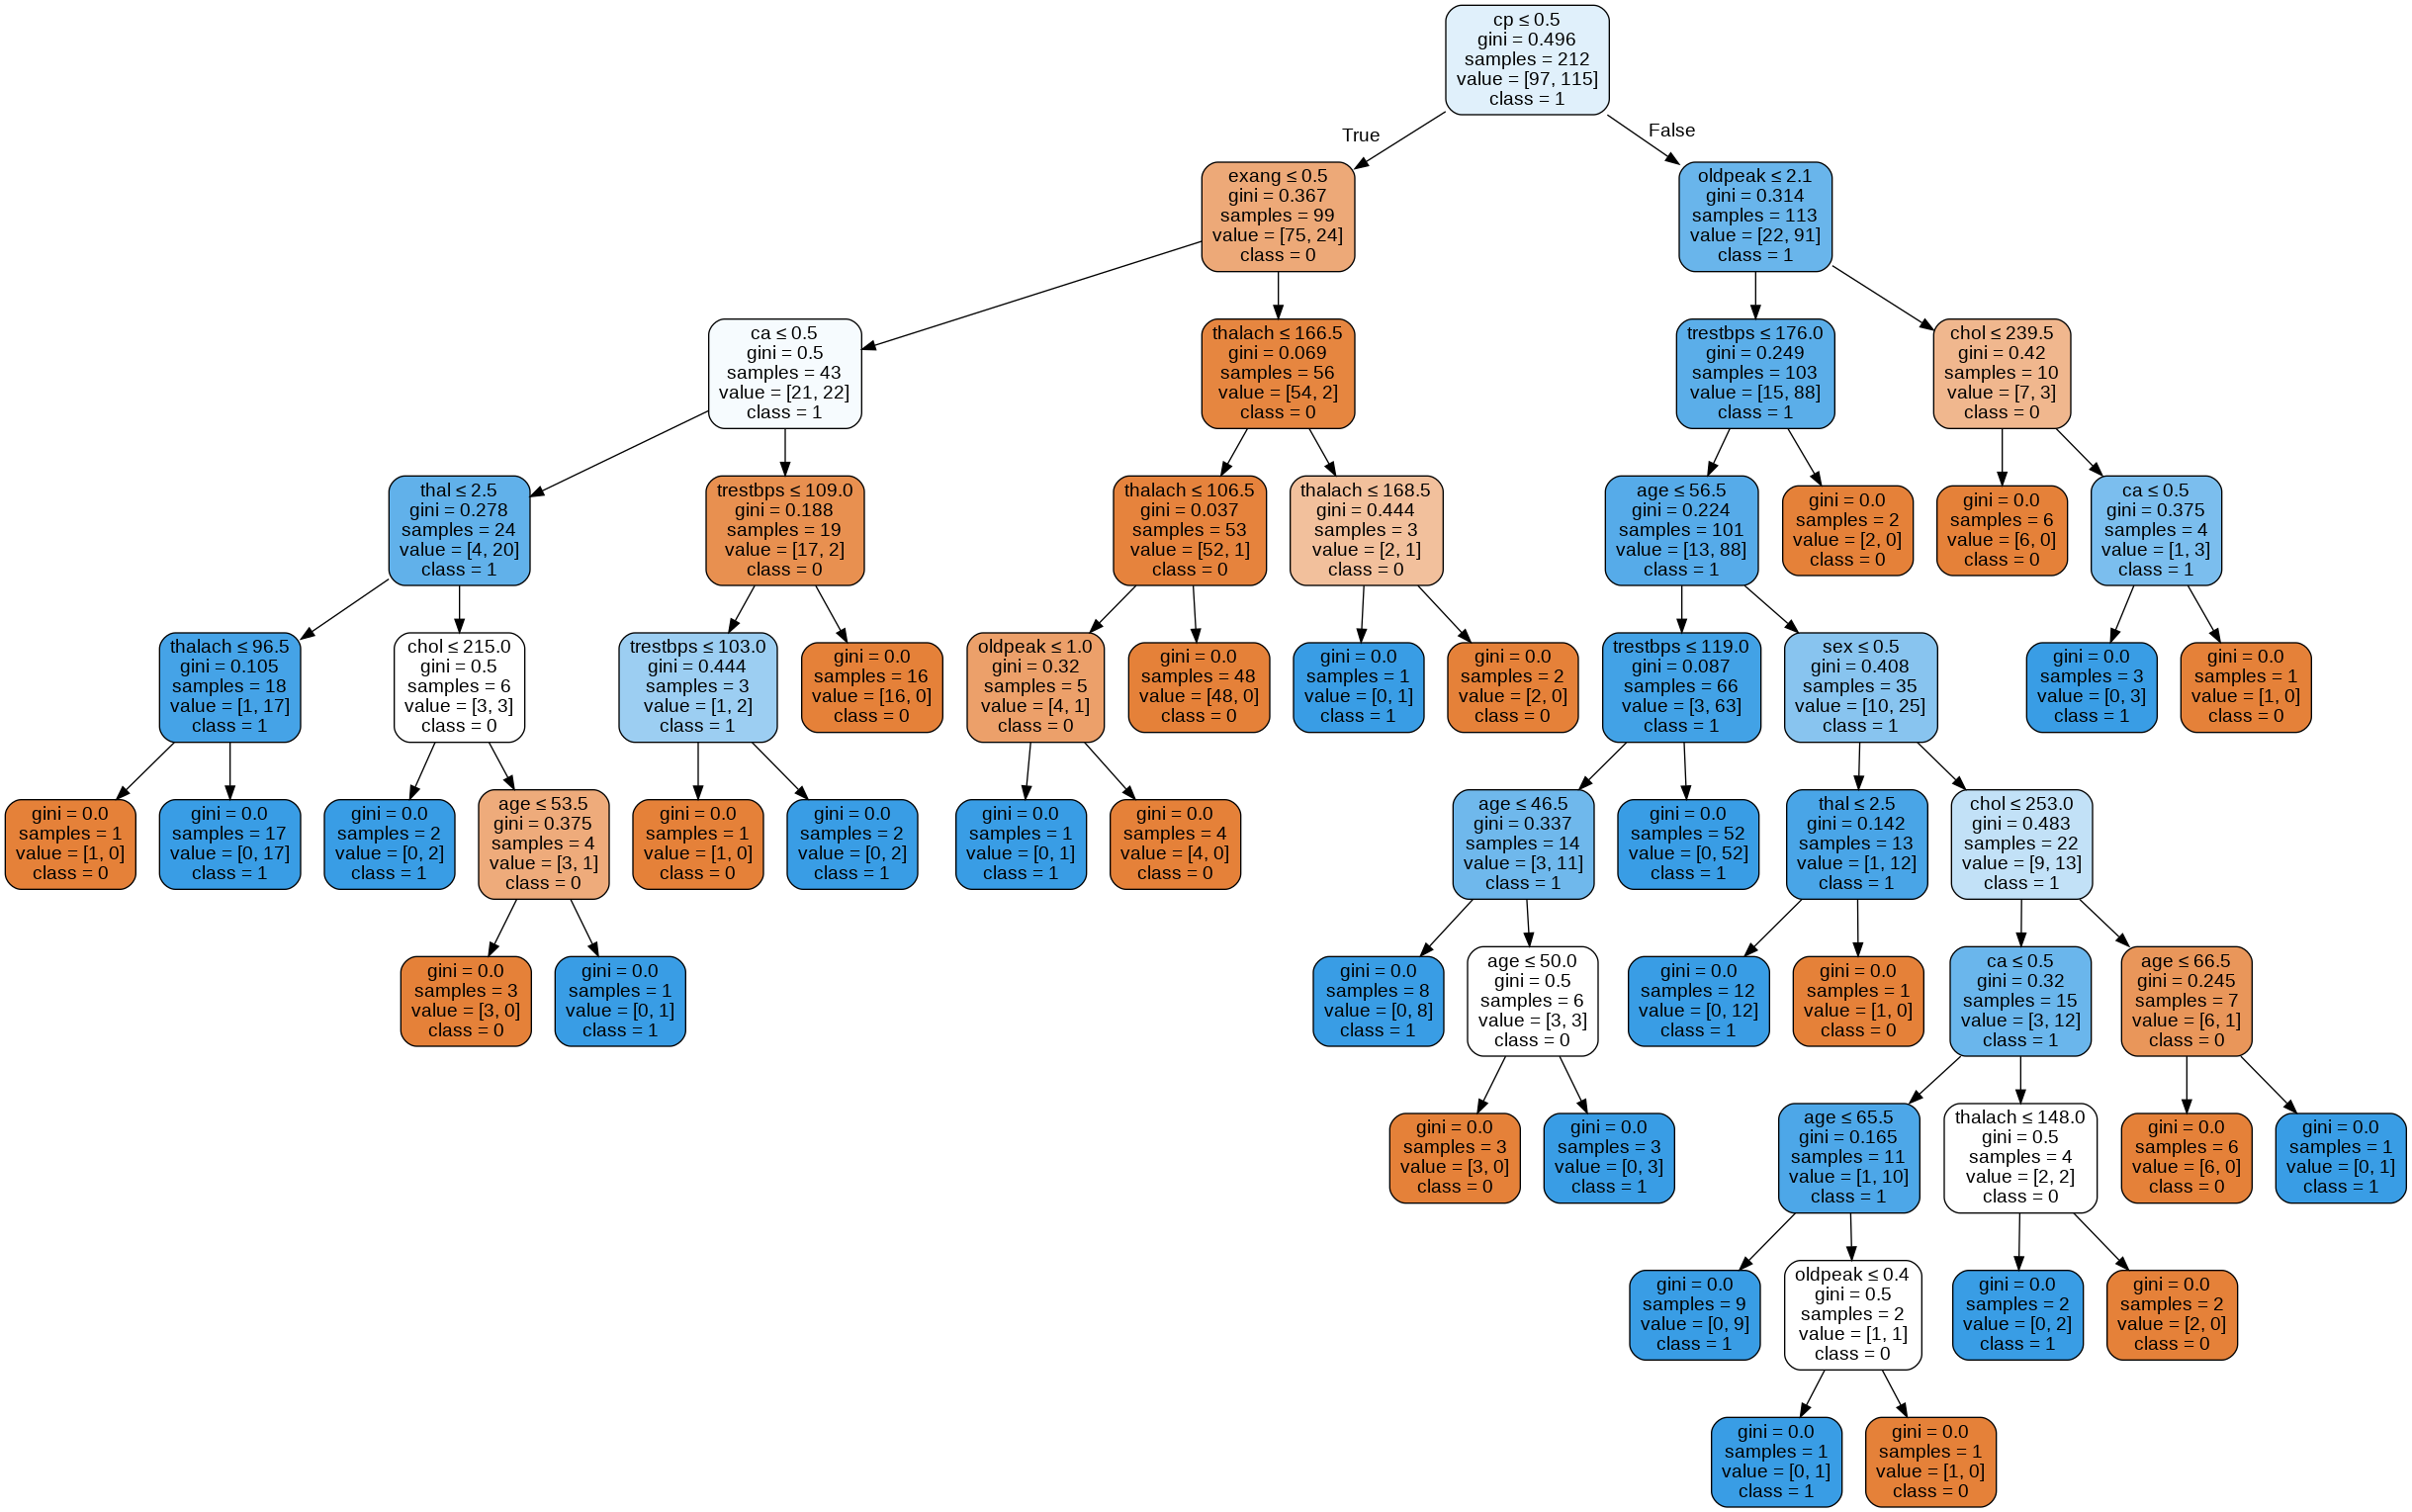

In [41]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names = feature_cols ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7362637362637363


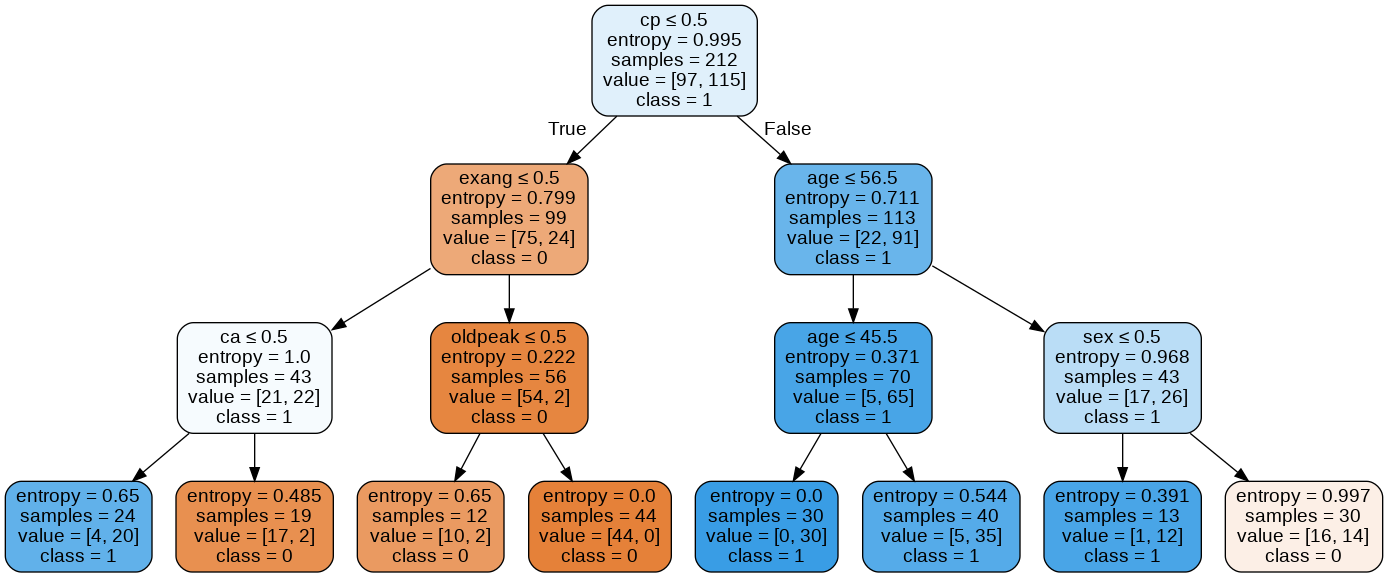

In [43]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
filled=True, rounded=True,
special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

**5. Data Pre-processing**

 **Pre-processing
Change Name of the column** 

*Change Name of the column*

In [44]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

We have 4 Categorical columns as seen in Data Description using pandas profiling:
- cp — chest_pain_type
- restecg — rest_ecg_type
- slope — st_slope_type
- thal — thalassemia_type

Generating categorical columns values

In [45]:
#cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'

In [46]:
df.head()

age  sex   chest_pain_type  ...  num_major_vessels  thalassemia_type  target
0   63    1    typical angina  ...                  0      fixed defect       1
1   37    1  non-anginal pain  ...                  0            normal       1
2   41    0   atypical angina  ...                  0            normal       1
3   56    1   atypical angina  ...                  0            normal       1
4   57    0      asymptomatic  ...                  0            normal       1

[5 rows x 14 columns]

 **One Hot Encoding** 

In [47]:
data = pd.get_dummies(df, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [48]:
df_temp = data['thalassemia_type_fixed defect']

In [49]:
data = pd.get_dummies(df, drop_first=True)

In [50]:
data.head()

age  sex  ...  thalassemia_type_nothing  thalassemia_type_reversable defect
0   63    1  ...                         0                                   0
1   37    1  ...                         0                                   0
2   41    0  ...                         0                                   0
3   56    1  ...                         0                                   0
4   57    0  ...                         0                                   0

[5 rows x 20 columns]

In [51]:
frames = [data, df_temp]
result = pd.concat(frames,axis=1)

result.head()

age  sex  ...  thalassemia_type_reversable defect  thalassemia_type_fixed defect
0   63    1  ...                                   0                              1
1   37    1  ...                                   0                              0
2   41    0  ...                                   0                              0
3   56    1  ...                                   0                              0
4   57    0  ...                                   0                              0

[5 rows x 21 columns]

*Since one hot encoding dropped “thalassemia_type_fixed defect” column which was a useful column compared to ‘thalassemia_type_nothing’ which is a null column, we dropped ‘thalassemia_type_nothing’ and concatinated ‘thalassemia_type_fixed defect’*

In [52]:
result.drop('thalassemia_type_nothing',axis=1,inplace=True)
resultc = result.copy()  # making a copy for further analysis in conclusion section

**6. Logistic Regression**

**1. Gather Columns**

In [53]:
result.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_normal', 'thalassemia_type_reversable defect',
       'thalassemia_type_fixed defect'],
      dtype='object')

In [54]:
X = result.drop('target', axis = 1)

In [55]:
y = result['target']

**2. Splitting Data**

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**3. Normalization**

*Min-Max Normalization method is used to Normalize the data. This method scales the data range to [0,1]. Standardization is also used on a feature-wise basis in most cases.*

In [58]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

**4. Fitting into Model**

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logre = LogisticRegression()

In [61]:
logre.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**5. Prediction**

In [62]:
y_pred = logre.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j)
dic = {'Actual':actual,
       'Prediction':predcition
       }
result  = pd.DataFrame(dic)
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

*The red dots represent the predicted values that is either 0 or 1 and the blue line & and dot represents the actual value of that particular patient. In the places where the red dot and blue dot do not overlap are the wrong predictions and where the both dots overlap those are the right predicted values.*

**6. Model Evaluation**

In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8688524590163934


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



*The classification report of the model shows that 91% prediction of absence of heart disease was predicted correct and 83% of presence of heart disease was predicted correct.*

[[24  3]
 [ 5 29]]


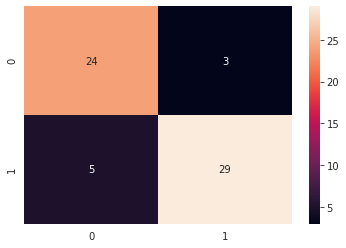

In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

**The Confusion Matrix**

*The Confusion Matrix True Positive value is 24 and true Negative was 29. And the False Positive came out to be 3 and False Negative is 5.*

**ROC Curve**

*ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.*

*The accuracy of the ROC curve came out to be 87.09%.*

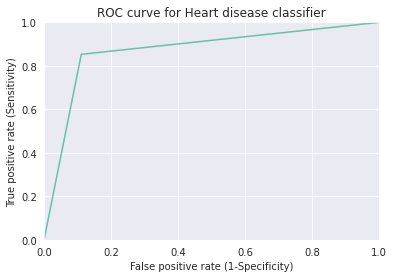

In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [67]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.8709150326797386

**7. Conclusion**

**1. Coefficients**

In [68]:
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[0.96772424]


Coeffecient
chest_pain_type_non-anginal pain               1.281633
chest_pain_type_typical angina                 1.036787
max_heart_rate_achieved                        1.028382
thalassemia_type_normal                        0.754872
chest_pain_type_atypical angina                0.732086
rest_ecg_type_normal                           0.338507
st_slope_type_upsloping                        0.212089
rest_ecg_type_left ventricular hypertrophy     0.066738
thalassemia_type_fixed defect                  0.009411
fasting_blood_sugar                           -0.135551
age                                           -0.415560
cholesterol                                   -0.457060
st_slope_type_flat                            -0.466004
resting_blood_pressure                        -0.537316
thalassemia_type_reversable defect            -0.612915
exercise_induced_angina                       -0.786479
sex                                           -1.124012
st_depression                                 -1.146936
num_major_vessels                             -2.272170

<Figure size 720x864 with 0 Axes>

**2. Analysis**

Preparing data for analysis

In [69]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [70]:
df4 = df[df['target'] == 0 ][['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']] #target 0 - people with heart disease

***Heart Diseased Patient’s visualization***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



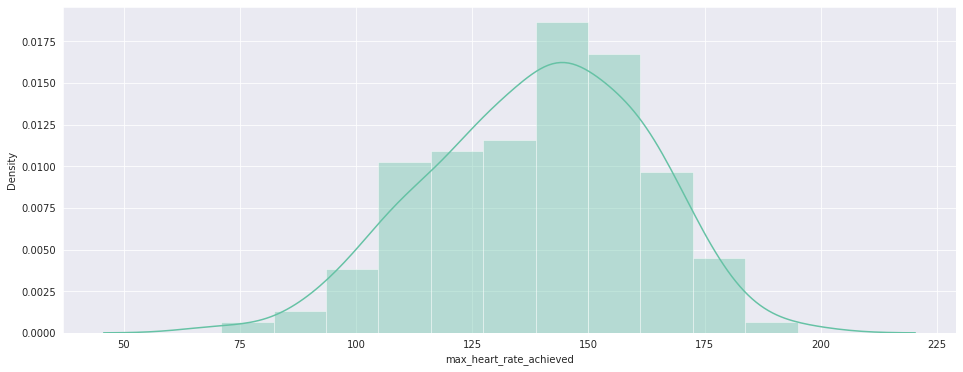

In [71]:
plt.figure(figsize=(16,6))
sns.distplot(df4['max_heart_rate_achieved'])

*Normal Heart rate is found to be between 60 and 100 bpm. Some areas of cardiac muscles will start to die during a Heart Attack because of Lack of Blood. A person’s pulse may become slower (bradycardia) or faster (tachycardiac) depending on the type of Heart Attack they are experiencing.*

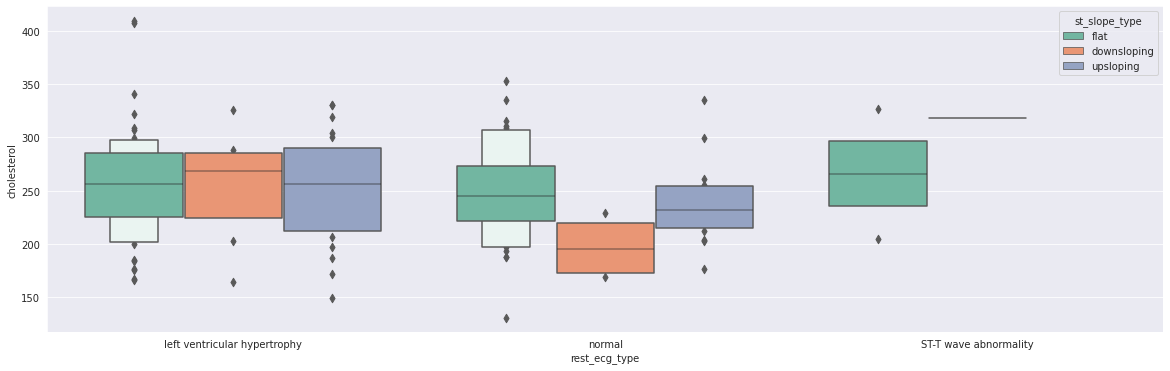

In [72]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df4,x='rest_ecg_type',y='cholesterol',hue='st_slope_type')

*In normal type of rest ECG proves to be important for the prediction model along with the down sloping ST slope. The patient composed of these two features usually has cholesterol level between 170 to 225 mg/dl. The other types of slops with the rest ECG seems to be more spread out and less concise.*

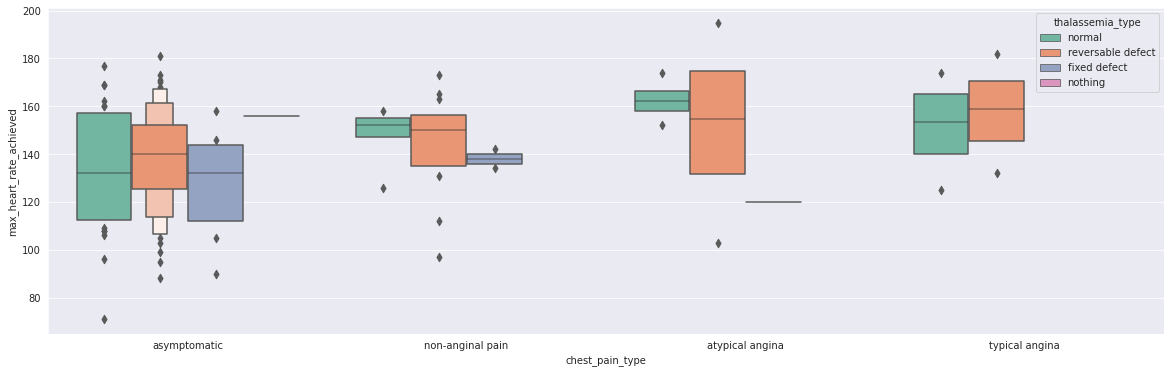

In [73]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df4,x='chest_pain_type',y='max_heart_rate_achieved',hue='thalassemia_type')

**Shap**

**Shap Values **

     |████████████████████████████████| 358kB 18.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491621 sha256=e1be4ecf8ef6e1703549091699752ab4d45c5a7c4af342a2be66ee0cca5871c9
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


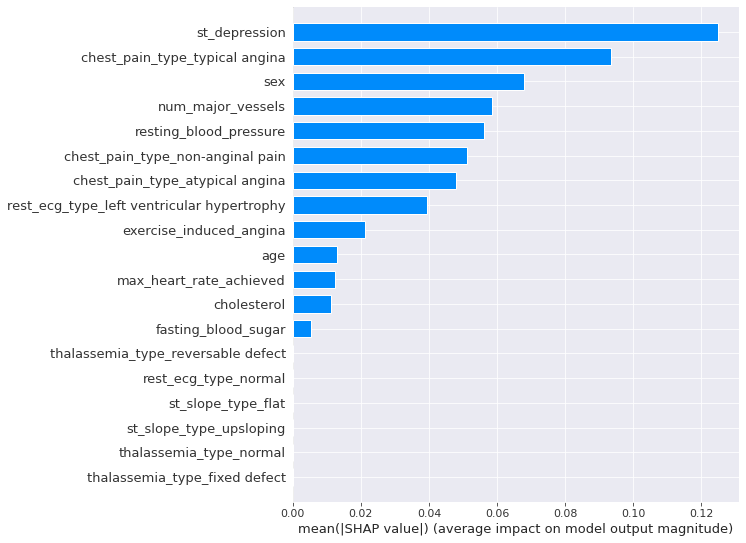

In [74]:
!pip install shap
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test,check_additivity=False)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

*Shap value for Model Explaination*

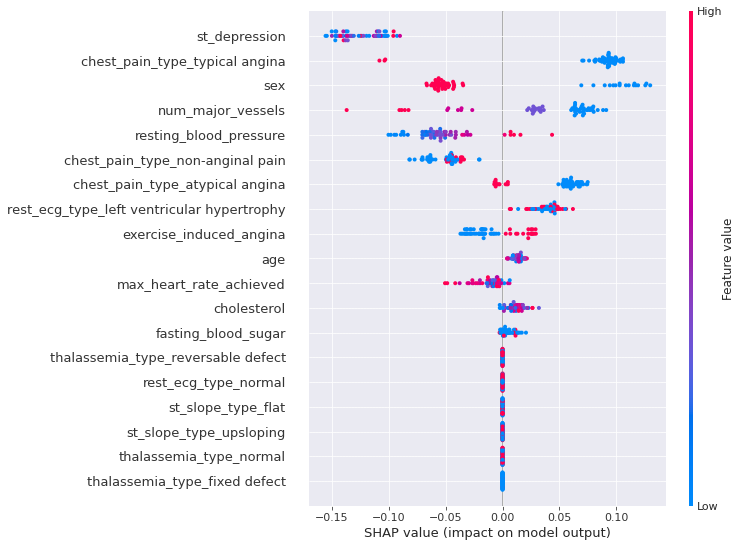

In [75]:
shap.summary_plot(shap_values[1], X_test)

In [76]:
def patient_analysis(model, patient):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(patient)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

*Reports for two Patients*

In [77]:
patients = X_test.iloc[3,:].astype(float)
patients_target = y_test.iloc[3:4]
print('Target : ',int(patients_target))
patient_analysis(model, patients)

Target :  0


In [78]:
patients = X_test.iloc[33,:].astype(float)
patients_target = y_test.iloc[33:34]
print('Target : ',int(patients_target))
patient_analysis(model, patients)

Target :  1


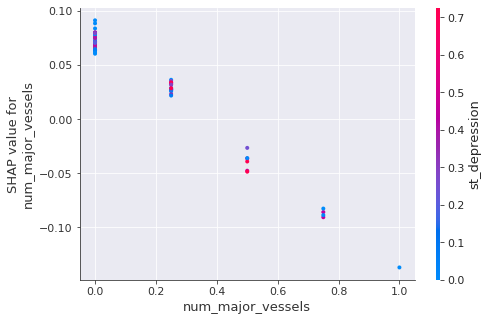

In [79]:
# dependence plot
shap.dependence_plot('num_major_vessels', shap_values[1], X_test, interaction_index = "st_depression")

In [80]:
shap_values = explainer.shap_values(X_train.iloc[:50],check_additivity=False)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])

In [81]:
y_test.iloc[10:11]

111    1
Name: target, dtype: int64

**3. Conclusion**

- The Area under the ROC curve is 87.09% which is somewhat satisfactory.
- The model predicted with 86.88% accuracy. The model is more specific than sensitive.
- According to this model the major features contributing in precision of predicting model are shown in the heatmap in Ascending order. 

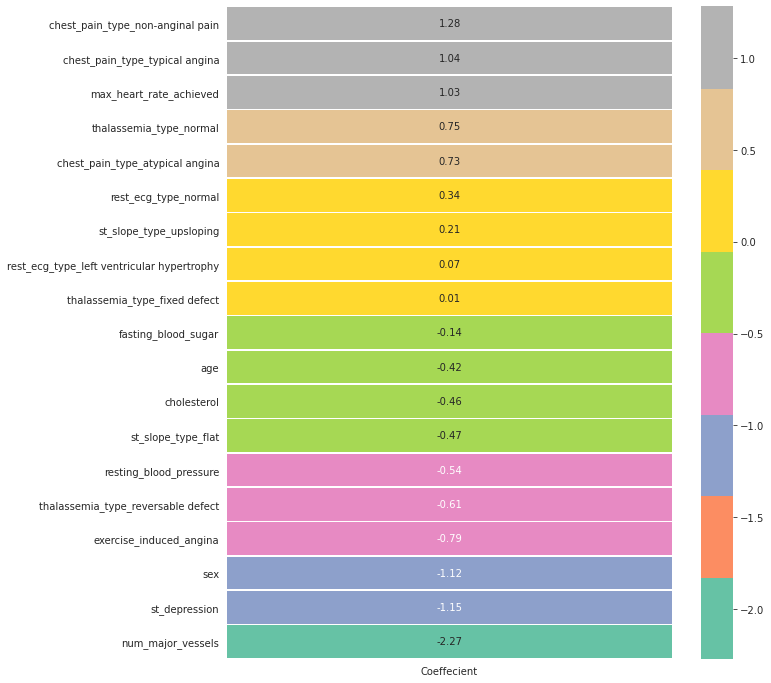

In [82]:
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
sns.heatmap(coeffecients,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)

*The important features contributing to the accuracy of the prediction are shown through the Heatmap in descending order. In silver color code, the most contributing feature, the chest pain types and maximum heart rate achieved proved to be more valuable by 1.28 to 1.03 units.*

In [83]:
new_test_Data=pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

In [84]:
new_test_Data.shape

(91, 13)

In [85]:
new_test_Data.info

<bound method DataFrame.info of     age  sex  cp  trestbps  chol  fbs  ...  thalach  exang  oldpeak  slope  ca  thal
0    46    0   0       138   243    0  ...      152      1      0.0      1   0     2
1    45    0   0       138   236    0  ...      152      1      0.2      1   0     2
2    59    1   3       160   273    0  ...      125      0      0.0      2   0     2
3    44    0   2       108   141    0  ...      175      0      0.6      1   0     2
4    47    1   2       108   243    0  ...      152      0      0.0      2   0     2
..  ...  ...  ..       ...   ...  ...  ...      ...    ...      ...    ...  ..   ...
86   51    1   0       140   261    0  ...      186      1      0.0      2   0     2
87   42    1   3       148   244    0  ...      178      0      0.8      2   2     2
88   56    1   1       120   240    0  ...      169      0      0.0      0   0     2
89   64    0   0       180   325    0  ...      154      1      0.0      2   0     2
90   58    0   2       120   340 

In [86]:
new_test_Data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [87]:
new_test_Data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [88]:
#Generating categorical columns values
#cp - chest_pain_type
new_test_Data.loc[new_test_Data['cp'] == 0, 'cp'] = 'asymptomatic'
new_test_Data.loc[new_test_Data['cp'] == 1, 'cp'] = 'atypical angina'
new_test_Data.loc[new_test_Data['cp'] == 2, 'cp'] = 'non-anginal pain'
new_test_Data.loc[new_test_Data['cp'] == 3, 'cp'] = 'typical angina'

#restecg - rest_ecg_type
new_test_Data.loc[new_test_Data['restecg'] == 0, 'restecg'] = 'left ventricular hypertrophy'
new_test_Data.loc[new_test_Data['restecg'] == 1, 'restecg'] = 'normal'
new_test_Data.loc[new_test_Data['restecg'] == 2, 'restecg'] = 'ST-T wave abnormality'

#slope - st_slope_type
new_test_Data.loc[new_test_Data['slope'] == 0, 'slope'] = 'downsloping'
new_test_Data.loc[new_test_Data['slope'] == 1, 'slope'] = 'flat'
new_test_Data.loc[new_test_Data['slope'] == 2, 'slope'] = 'upsloping'

#thal - thalassemia_type
new_test_Data.loc[new_test_Data['thal'] == 0, 'thal'] = 'nothing'
new_test_Data.loc[new_test_Data['thal'] == 1, 'thal'] = 'fixed defect'
new_test_Data.loc[new_test_Data['thal'] == 2, 'thal'] = 'normal'
new_test_Data.loc[new_test_Data['thal'] == 3, 'thal'] = 'reversable defect'

In [89]:
new_test_Data = pd.get_dummies(new_test_Data, drop_first=False)
new_test_Data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal pain',
       'cp_typical angina', 'restecg_ST-T wave abnormality',
       'restecg_left ventricular hypertrophy', 'restecg_normal',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

**Reference**

1. https://towardsdatascience.com

2. https://dphi.tech

**Thank You**